In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date

In [2]:
# Getting the data using nsepy library

df = get_history(symbol = "SBIN", start = date(2015,12,20), end = date(2021,5,3))

In [3]:
# Calculate simple return

df["simple_return"] = (df["Close"] / df["Close"].shift(1)) - 1
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,simple_return
Date,,,,,,,,,,,,,,,
2015-12-21,SBIN,EQ,226.50,226.90,231.00,226.5,230.50,230.45,229.56,9557098,2.193930e+14,82470,3058303,0.3200,NaN
2015-12-22,SBIN,EQ,230.45,231.65,232.25,227.5,228.65,228.35,230.09,9155574,2.106648e+14,69702,3457655,0.3777,-0.009113
2015-12-23,SBIN,EQ,228.35,230.25,231.00,228.9,229.75,229.65,230.10,7914311,1.821092e+14,55788,3057822,0.3864,0.005693
2015-12-24,SBIN,EQ,229.65,230.85,231.00,227.6,228.50,228.30,228.67,7257958,1.659699e+14,47333,2670535,0.3679,-0.005879
2015-12-28,SBIN,EQ,228.30,229.05,229.95,228.0,228.60,228.90,228.99,8756879,2.005222e+14,60826,4081164,0.4661,0.002628


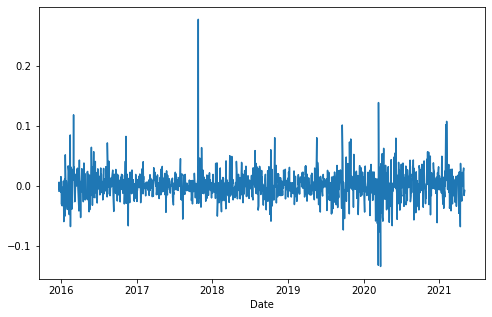

In [4]:
# Plot the chart of simple return

df["simple_return"].plot(figsize=(8,5))
plt.show()

In [5]:
# Calculate the mean of simple return

avg_return = df["simple_return"].mean()

In [7]:
# Calculate average return as per total working days of year

avg_return_a = round(avg_return*250*100, 2)
print(f"Average Return : {avg_return_a}%")

Average Return : 15.17%


In [8]:
# Calculate Log return

df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,simple_return,log_return
Date,,,,,,,,,,,,,,,,
2015-12-21,SBIN,EQ,226.50,226.90,231.00,226.5,230.50,230.45,229.56,9557098,2.193930e+14,82470,3058303,0.3200,NaN,NaN
2015-12-22,SBIN,EQ,230.45,231.65,232.25,227.5,228.65,228.35,230.09,9155574,2.106648e+14,69702,3457655,0.3777,-0.009113,-0.009154
2015-12-23,SBIN,EQ,228.35,230.25,231.00,228.9,229.75,229.65,230.10,7914311,1.821092e+14,55788,3057822,0.3864,0.005693,0.005677
2015-12-24,SBIN,EQ,229.65,230.85,231.00,227.6,228.50,228.30,228.67,7257958,1.659699e+14,47333,2670535,0.3679,-0.005879,-0.005896
2015-12-28,SBIN,EQ,228.30,229.05,229.95,228.0,228.60,228.90,228.99,8756879,2.005222e+14,60826,4081164,0.4661,0.002628,0.002625


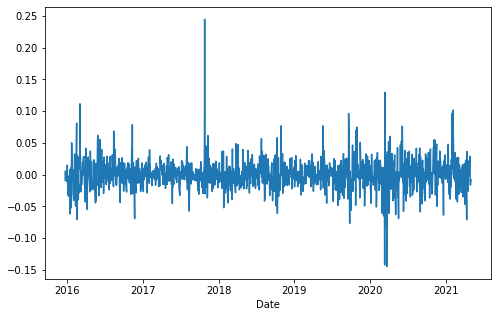

In [10]:
# Plot the chart of log return

df["log_return"].plot(figsize=(8,5))
plt.show()

In [11]:
# Calculate mean of log return and also calculate log return as per total working day of year

log_return = df["log_return"].mean()
log_return_a = round(log_return*250*100, 2)
print(f"Log Return : {log_return_a}%")

Log Return : 7.91%


In [12]:
# List of stocks for analysis

stocks = ["DABUR", "ACC", "AXISBANK", "TATASTEEL", "RELIANCE"]

In [13]:
# Creating of datarame for stocks data

mydata = pd.DataFrame()
for i in stocks:
    mydata[i] = get_history(symbol = i, start = date(2015,5,1), end = date(2021,5,1))["Close"]

In [14]:
mydata.head()

,DABUR,ACC,AXISBANK,TATASTEEL,RELIANCE
Date,,,,,
2015-05-04,261.45,1474.60,568.35,361.65,890.95
2015-05-05,264.60,1471.40,565.85,380.10,892.15
2015-05-06,263.10,1413.30,543.30,367.65,880.25
2015-05-07,257.20,1451.95,527.35,367.30,870.75
2015-05-08,260.85,1448.50,540.80,366.70,889.70


In [15]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1485 entries, 2015-05-04 to 2021-04-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DABUR      1485 non-null   float64
 1   ACC        1485 non-null   float64
 2   AXISBANK   1485 non-null   float64
 3   TATASTEEL  1485 non-null   float64
 4   RELIANCE   1485 non-null   float64
dtypes: float64(5)
memory usage: 69.6+ KB


In [16]:
mydata.describe()

,DABUR,ACC,AXISBANK,TATASTEEL,RELIANCE
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,373.727946,1506.358249,563.867205,462.535387,1268.080101
std,91.076094,172.479477,108.978942,151.127893,374.978706
min,236.350000,918.200000,303.150000,201.400000,780.900000
25%,286.350000,1380.050000,488.000000,342.600000,980.500000
50%,364.000000,1501.250000,539.950000,456.050000,1128.300000
75%,453.300000,1632.050000,641.650000,567.750000,1434.900000
max,575.000000,1981.650000,822.800000,1034.000000,2324.550000


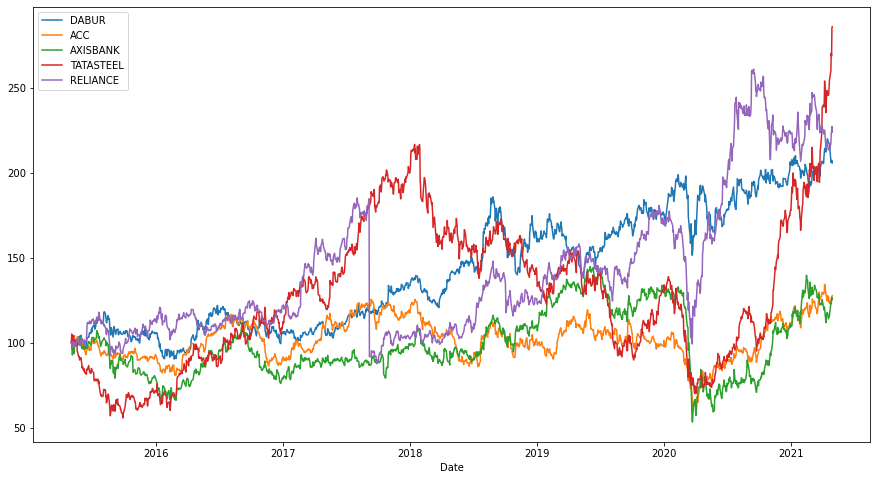

In [17]:
# After normalizing the data, plotting the chart of same for better understanding

(mydata / mydata.iloc[0]*100).plot(figsize=(15,8));
plt.show()

In [18]:
# Calculate the returns of all stocks in dataframe

returns = (mydata / mydata.shift(1)) - 1
returns.head()

,DABUR,ACC,AXISBANK,TATASTEEL,RELIANCE
Date,,,,,
2015-05-04,NaN,NaN,NaN,NaN,NaN
2015-05-05,0.012048,-0.002170,-0.004399,0.051016,0.001347
2015-05-06,-0.005669,-0.039486,-0.039852,-0.032755,-0.013339
2015-05-07,-0.022425,0.027347,-0.029358,-0.000952,-0.010792
2015-05-08,0.014191,-0.002376,0.025505,-0.001634,0.021763


In [19]:
# Define the weights of stocks in portfolio

weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [20]:
# Calculate the annual return of portfolio-1

annual_returns = returns.mean()*250
port_1 = round(np.dot(annual_returns, weights)*100, 2)
print(f"Annual return of Portfolio 1 is : {port_1}%")

Annual return of Portfolio 1 is : 16.22%


In [21]:
# Calculate the annual return of portfolio-2

weights_2 = np.array([0.10, 0.20, 0.5, 0.30, 0.35])
port_2 = round(np.dot(annual_returns, weights_2)*100, 2)
print(f"Annual return of Portfolio 2 is : {port_2}%")

Annual return of Portfolio 2 is : 23.77%
